### Noblige-1 source rock plot using Plotly interactive subplots

Noblige-1 is a petroleum exploration well drilled by Woodside Energy Ltd. on the Outer Exmouth Plateau, offshore Western Australia.

This notebook demostrates the following:

1. Importing various data types from various sources (las, csv, Excel and PDF files)
2. Cleaning data where required (mostly in Python, some in Excel)
3. Creation of a vsualisation plot of several parameters acquired while drilling the well, and from post-well analysis.

The raw data includes petrophysical logs, source rock data (TOC and Rock Eval), vitrinite reflectance and stratigraphic information.

All data is open-file and publicly available, and was downloaded from https://nopims.dmp.wa.gov.au/nopims

In [1]:
# Import the various modules required

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
import lasio
import tabula as tb

In [2]:
# Function to read and clean log, TOC_RE and Vr data

def read_data(logs_fname, TOC_RE_fname, Vr_fname):
    global logs 
    logs = lasio.read(logs_fname).df()
    TOC_RE_raw = pd.read_excel(TOC_RE_fname,
                               sheet_name="RE_Table_2", 
                               header=[4],
                               nrows=42)    # to exclude the additional text rows under the table
    global Vr_raw
    Vr_raw = pd.read_csv(Vr_fname)
    global TOC_RE 
    TOC_RE = TOC_RE_raw.replace('nd', np.NaN)

In [3]:
# Read files

read_data("Data/NOBLIGE_1_22_09_10SCALAR.las", 
          "Data/Noblige_1_RE_data_final.xls",
          "Data/Noblige-1_Vr.csv")

In [4]:
# Reset log dataframe index

logs.reset_index(inplace=True)

In [5]:
# Rename TOC_RE dataframe unnamed column

TOC_RE = TOC_RE.rename(columns={'Unnamed: 2': 'Sample type'})

In [7]:
# Assign log, TOC_RE and Vr data to variable names

Depth1 = logs['DEPTH']
GR = logs['GR']

Depth2 = TOC_RE['Upp Depth (m)']
TOC = TOC_RE['TOC']
S2 = TOC_RE['S2 ']  # note trailing space in heading
HI = TOC_RE['HI']
PI = TOC_RE['PI ']  # note trailing space in heading
Tmax = TOC_RE['Tmax']

Depth3 = Vr_raw['Top Depth (m)']
Vr = Vr_raw['Mean Ro (%)']

In [8]:
# Read stratigraphy from Well Completion Report (PDF)

strat_table = tb.read_pdf("Data/Noblige_1_WCR_Interpretive_Data.pdf",
                            pages=[13, 14],
                            pandas_options={'header': None})

# Concatenate stratigraphy into one dataframe

for strat in strat_table:
    strat = pd.concat(strat_table)
    
# Export to csv for cleaning in Excel
    
strat.to_csv("Data/Noblige-1_strat_messy.csv", 
             index=False)

In [9]:
# Import stratigraphic picks

Picks = pd.read_csv("Data/Noblige-1_strat_clean.csv")

# Create list of x plot values

Picks_x = []

for i in range(len(Picks)):
        Picks_x.append(250)    # x plot value of 250 (max of GR axis)
    
# Add Picks_x column to Picks dataframe

Picks['picks_x'] = Picks_x

# Assign formation data to variable names

Fm_depth = Picks['Actual Depth (mMDRT)']
Fm_name = Picks['Marker']
Fm_x = Picks['picks_x']

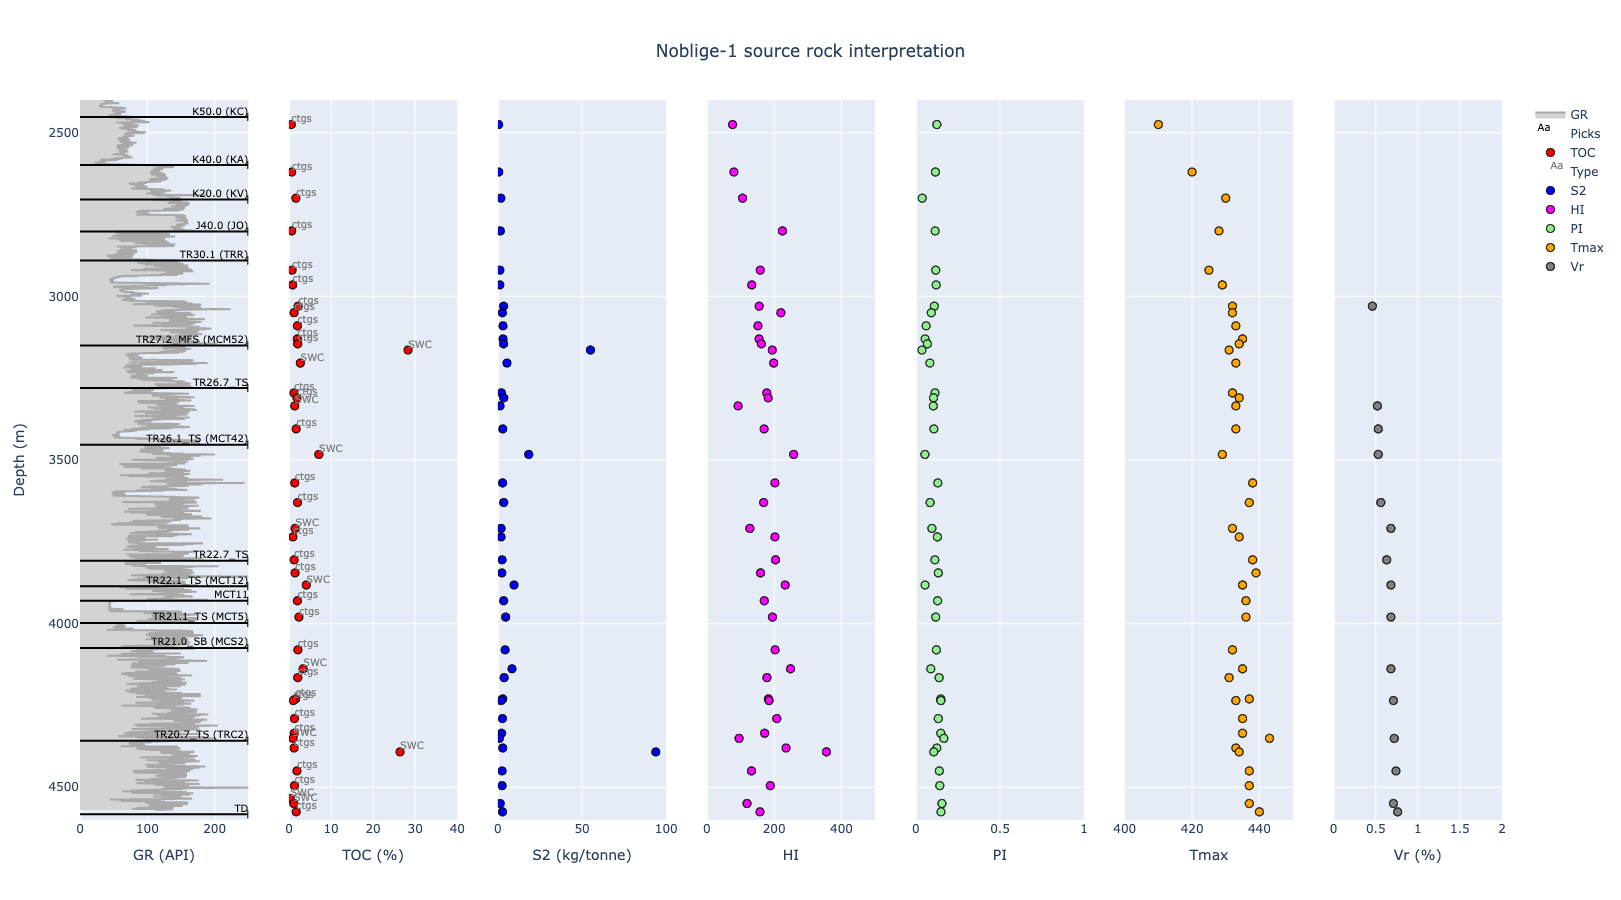

In [10]:
# Configure and display plot with Plotly make_subplots()

fig = make_subplots(rows=1, cols=7, shared_yaxes=True)

# Gamma ray with color fill

fig.add_trace(go.Scatter(x=GR, y=Depth1, 
                         name='GR',
                         line=dict(color='darkgrey'),
                         fill='tozerox',
                         fillcolor = 'lightgrey'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=Fm_x, 
                         y=Fm_depth, 
                         name='Picks', 
                         line=dict(color='black'), 
                         mode='text', 
                         error_x=dict(type='constant', 
                                      symmetric=False, 
                                      value=0, 
                                      valueminus=300, 
                                      color='black'), 
                         text=Fm_name, 
                         textposition='top left', 
                         textfont=dict(color='black'),
                         textfont_size=10), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=TOC, y=Depth2, 
                         name='TOC', 
                         line=dict(color='black'), 
                         mode='markers', 
                         marker=dict(size=8, 
                                     line=dict(width=1), 
                                     color='red')), 
              row=1, col=2)

fig.add_trace(go.Scatter(x=TOC, y=Depth2, 
                         name='Type', 
                         line=dict(color='black'), 
                         mode='text', 
                         text=TOC_RE['Sample type'], 
                         textposition='top right', 
                         textfont=dict(color='grey'),
                         textfont_size=10), 
              row=1, col=2)

fig.add_trace(go.Scatter(x=S2, y=Depth2, 
                         name='S2', 
                         line=dict(color='black'), 
                         mode='markers',
                         marker=dict(size=8, 
                                     line=dict(width=1), 
                                     color='blue')), row=1, col=3)

fig.add_trace(go.Scatter(x=HI, y=Depth2, 
                         name='HI', 
                         line=dict(color='black'), 
                         mode='markers',
                         marker=dict(size=8, 
                                     line=dict(width=1), 
                                     color='magenta')), 
              row=1, col=4)

fig.add_trace(go.Scatter(x=PI, y=Depth2, 
                         name='PI', 
                         line=dict(color='black'), 
                         mode='markers',
                         marker=dict(size=8, 
                                     line=dict(width=1), 
                                     color='lightgreen')), row=1, col=5)

fig.add_trace(go.Scatter(x=Tmax, y=Depth2, 
                         name='Tmax', 
                         line=dict(color='black'), 
                         mode='markers',
                         marker=dict(size=8, 
                                     line=dict(width=1), 
                                     color='orange')), 
              row=1, col=6)

fig.add_trace(go.Scatter(x=Vr, y=Depth3, 
                         name='Vr', 
                         line=dict(color='black'), 
                         mode='markers',
                        marker=dict(size=8, 
                                     line=dict(width=1), 
                                     color='grey')), row=1, col=7)

fig.update_xaxes(title_text='GR (API)', 
                 row=1, col=1, 
                 type='linear', range=[0, 250])

fig.update_xaxes(title_text='TOC (%)', 
                 row=1, col=2, 
                 type='linear', range=[0, 40])

fig.update_xaxes(title_text='S2 (kg/tonne)', 
                 row=1, col=3, 
                 type='linear', range=[0, 100])

fig.update_xaxes(title_text='HI', 
                 row=1, col=4, 
                 type='linear', range=[0, 500])

fig.update_xaxes(title_text='PI', 
                 row=1, col=5, 
                 type='linear', range=[0, 1])

fig.update_xaxes(title_text='Tmax', 
                 row=1, col=6, 
                 type='linear', range=[400, 450])

fig.update_xaxes(title_text='Vr (%)', 
                 row=1, col=7, 
                 type='linear', range=[0, 2])

fig.update_yaxes(title_text='Depth (m)', 
                 row=1, col=1, 
                 range=[4600, 2400])

fig.update_layout(template='plotly',
                  height=900, 
                  title={'text':'Noblige-1 source rock interpretation',
                         'y':0.95,
                         'x':0.5,                         
                         'xanchor':'center',                         
                         'yanchor':'top'})
                  
fig.show()
fig.write_html("Noblige-1_mud_gas_plot_interactive.html", 
               include_plotlyjs='cdn')